In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['ggplot', 'assets/class.mplstyle'])

red = '#E24A33'
blue = '#348ABD'
purple = '#988ED5'
gray = '#777777'
yellow = '#FBC15E'
green = '#8EBA42'
pink = '#FFB5B8'

# Statistics for Astronomers

Astronomy is physics. As such, what we study should be deterministic. But so is a coin toss and yet, it makes sense to treat it as probabilistic. It's a sane way to deal with complexities that go beyond our capabilities (in measurement, understanding, etc.).

> _"There are three kinds of lies: lies, damned lies, and statistics."_
>
> -- (Anonymous but popularized by) Mark Twain.

Statistics is also a tool to retrieve information from data (if we are careful/honest/explicit).

# 1. Quick overview of Probabilities

*Not meant to be an exahustive overview, just a reminder of few important results*

Let's call $A$ and $B$ two different events (possible outcomes of some experiment). $p(A)$ is the *probability* of $A$.

![venn diagram](images/01-prob_venn.png)

The probability that $A$ OR $B$ will happen is:

$$p(A\cup B) = p(A) + p(B) - p(A\cap B)$$

The probability that $A$ AND $B$ will happen is $p(A\cap B)$.

The conditional probability that $A$ will happen given that we know $B$ has occurred is:

$$p(A|B) = \frac{p(A\cap B)}{p(B)}$$

Two events $A$ and $B$ are defined to be independent if:

$$p(A\cap B) = p(A) p(B)$$

# 2. Random Variables

$X$ and $Y$ are random variables. They can take different **numerical** values, following some distribution of probabilities. In general they are functions of the outcome space where $A$ and $B$ are defined (e.g., the number of heads you get after flipping a coin a certain number of times).

The **Cumulative Distribution Function (CDF)** $F$ (sometimes just called distribution function), of a random variable $X$  is defined as:

$$F(x) = P(X\leq x) = \sum_{x_i<x} p(X=x_i)$$

for the case in which $X$ takes discrete values. In this case $p(x)$ is the **probability mass function (PMS)**.

When $X$ takes continuous values, we talk about the **probability density function (PDF)**. In that case:

$$F(x) = \int_{-\infty}^x h(y) dy $$

where $h(y)$ is the PDF.

Two random variables $X$ and $Y$ are independent if:

$$p(X\leq a, Y\leq b) = p(X\leq a) p(Y\leq b)$$

# 2.1 Moments of a distribution (descriptive statistics).

|               |             |   |                                                 |
|---------------|------------:|---|:------------------------------------------------| 
| Mean ($\mu$): | $E(X)$      | = | $\int_{-\infty}^{\infty} x h(x) dx$             |
| Variance:     | $Var(X)$    | = | $\int_{-\infty}^{\infty} (x-\mu)^2 h(x) dx$     |
| Skweness:     | $\Sigma(X)$ | = | $\int_{-\infty}^{\infty} (x-\mu)^3 h(x) dx$     |
| Kurtosis:     | $K(X)$      | = | $\int_{-\infty}^{\infty} (x-\mu)^4 h(x) dx - 3$ |

Notice the $-3$ in the Kurtosis. It is measured relative to the Gaussian distribution.

# 3. Common Distributions in Astronomy

## 3.1 The Gaussian Distribution

It's one of the most important distributions in statistics thanks to the **Central Limit Theorem (CLT)** that we will talk about later. First, let's review where it comes up in Astronomy and what are its main properties.

$X\sim \mathcal{N}(\mu, \sigma^2)$ means that $X$ is a random variable distributed as a gaussian with parameters $\mu$ (the mean) and $\sigma^2$ (the variance, we will see the moments next).

$\mathcal{N}(\mu, \sigma^2)$ is defined by the PDF $f(x)$:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right) $$

which has the following moments:

|               |             |   |            |
|---------------|------------:|---|:-----------| 
| Mean ($\mu$): | $E(X)$      | = | $\mu$      |
| Variance:     | $Var(X)$    | = | $\sigma^2$ |
| Skweness:     | $\Sigma(X)$ | = | 0          |
| Kurtosis:     | $K(X)$      | = | 0          |


In [2]:
from scipy.stats import norm

# These values are just for the example
mu = 5.0
sigma = 2.0

gaussian_rv = norm(loc=mu, scale=sigma)

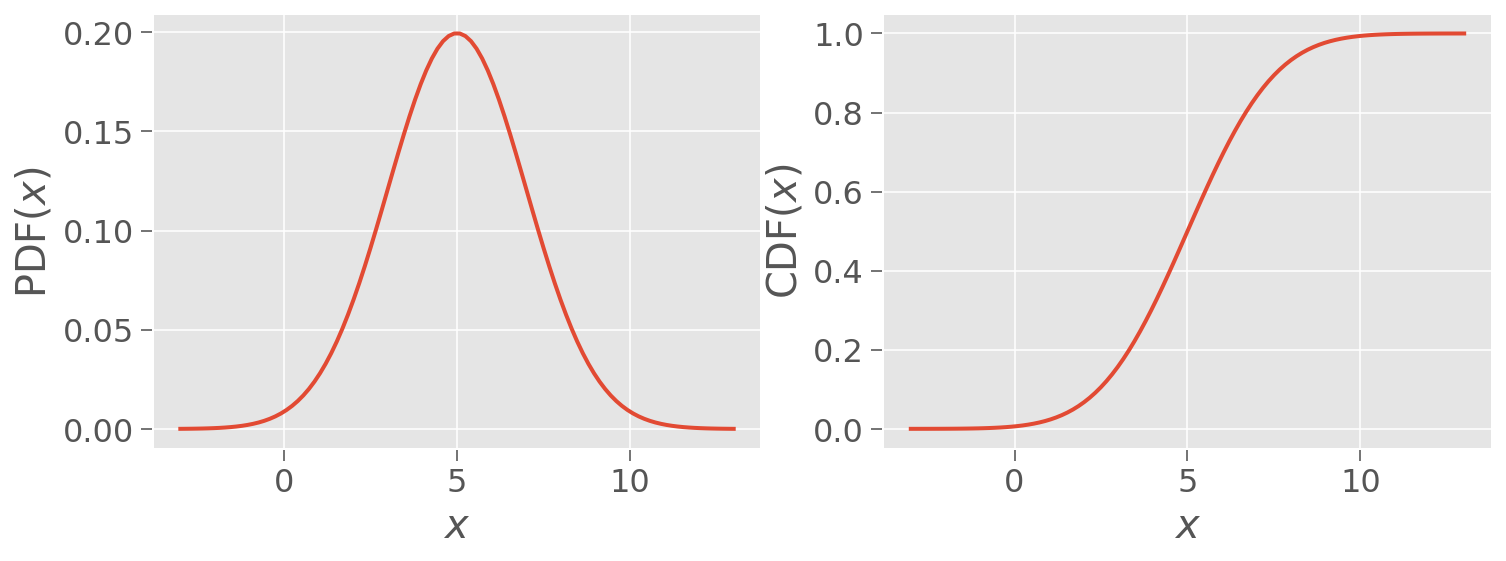

In [3]:
x_to_plot = np.linspace(-3, 13, 100)

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(x_to_plot, gaussian_rv.pdf(x_to_plot))
plt.xlabel('$x$')
plt.ylabel('PDF($x$)')

plt.subplot(122)
plt.plot(x_to_plot, gaussian_rv.cdf(x_to_plot))
plt.xlabel('$x$')
_= plt.ylabel('CDF($x$)')

We can ask for its moments:

In [4]:
E, V, S, K = gaussian_rv.stats(moments='mvsk')
print('E(x)={}, Var(x)={}, Sigma(x)={}, K(x)={}'.format(E, V, S, K))

E(x)=5.0, Var(x)=4.0, Sigma(x)=0.0, K(x)=0.0


## 3.1.1 Confidence intervals.

The general idea is that when making a measurement through some experiment (which can be as simple as measuring a length with measuring tape), the outcome can be treated as a random variable. This means that the value we obtain changes each time we repeat the experiment. If we know the distribution from which said random variable is drawn, we can say things about the confidence that we have on our measurement.

**Because of the CLT, we can often treat our experimental outcome as random variable drawn from a gaussian distribution.**

It is very common to talk about 1$\sigma$ *errors* (better call them uncertainties), let's see what it means.

In [5]:
from scipy.integrate import quad

integral_1_sigma = quad(gaussian_rv.pdf, mu-sigma, mu+sigma)
integral_2_sigma = quad(gaussian_rv.pdf, mu-2*sigma, mu+2*sigma)
integral_3_sigma = quad(gaussian_rv.pdf, mu-3*sigma, mu+3*sigma)
integral_5_sigma = quad(gaussian_rv.pdf, mu-5*sigma, mu+5*sigma)

print('1 sigma area: {:.3f}'.format(integral_1_sigma[0]))
print('2 sigma area: {:.3f}'.format(integral_2_sigma[0]))
print('3 sigma area: {:.3f}'.format(integral_3_sigma[0]))
print('5 sigma area: {:.8f}'.format(integral_5_sigma[0]))

1 sigma area: 0.683
2 sigma area: 0.954
3 sigma area: 0.997
5 sigma area: 0.99999943


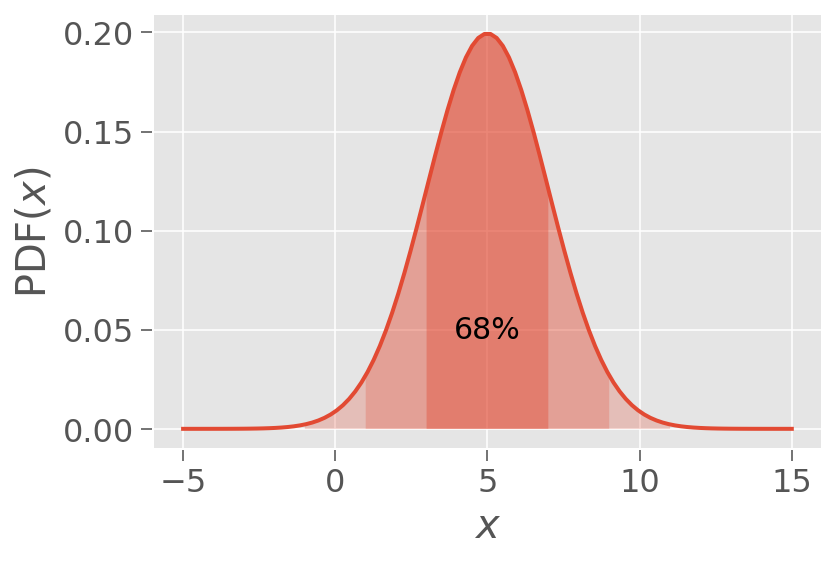

In [6]:
x_to_plot = np.linspace(mu-5*sigma, mu+5*sigma, 100)
plt.plot(x_to_plot, gaussian_rv.pdf(x_to_plot))

x_to_plot = np.linspace(mu-3*sigma, mu+3*sigma, 100)
plt.fill_between(x_to_plot, gaussian_rv.pdf(x_to_plot), 0, 
                 facecolor=red, alpha=0.25)

x_to_plot = np.linspace(mu-2*sigma, mu+2*sigma, 100)
plt.fill_between(x_to_plot, gaussian_rv.pdf(x_to_plot), 0, 
                 facecolor=red, alpha=0.25)

x_to_plot = np.linspace(mu-1*sigma, mu+1*sigma, 100)
plt.fill_between(x_to_plot, gaussian_rv.pdf(x_to_plot), 0, 
                 facecolor=red, alpha=0.4)

plt.text(5, 0.05, '68%', va='center', ha='center', fontsize=15)

plt.xlabel('$x$')
_= plt.ylabel('PDF($x$)')

One way to phrase this is: 
> "If we were to repeat the experiment many times, only 0.3% of the times would our measurement be outside the $\pm3\sigma$ range"

The `percentile point function` is a related useful concept. It is the inverse of the cumulative function. We can use it to find at what value of $x$:

$$\int_{-\infty}^x f(y) dy = \alpha $$

The percentile 2.5% is located at x=1.080
The percentile 16.0% is located at x=3.011
The percentile 84.0% is located at x=6.989
The percentile 97.5% is located at x=8.920


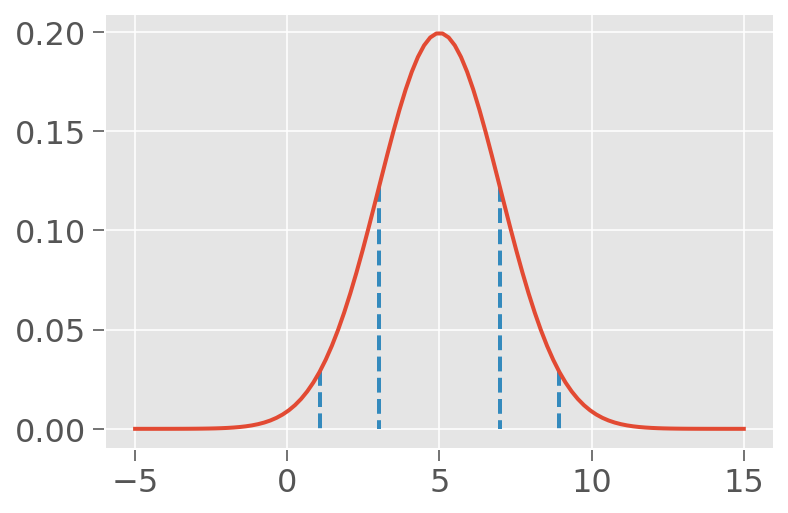

In [7]:
q = [0.025, 0.16, 0.84, 0.975]
l = gaussian_rv.ppf(q)

for q_i, l_i in zip(q, l):
    print('The percentile {}% is located at x={:.3f}'.format(100*q_i, l_i))

x_to_plot = np.linspace(mu-5*sigma, mu+5*sigma, 100)
plt.plot(x_to_plot, gaussian_rv.pdf(x_to_plot))

_= plt.vlines(l, gaussian_rv.pdf(l), 0, color=blue, linestyle='--')

## 3.1.1.1 Monte Carlo Experiments.

I find it very useful to make Monte Carlo experiments to gain insight on this sort of statement. Here is a very nice presentation that someone did on this concept: [Statistics for Hackers](https://www.youtube.com/watch?v=Iq9DzN6mvYA).

The idea is to make random realizations ourselves and test things like the meaning of the confidence intervals.

Let's explore the Gaussian Distribution and its confidence intervals.

In [8]:
np.random.seed(42)

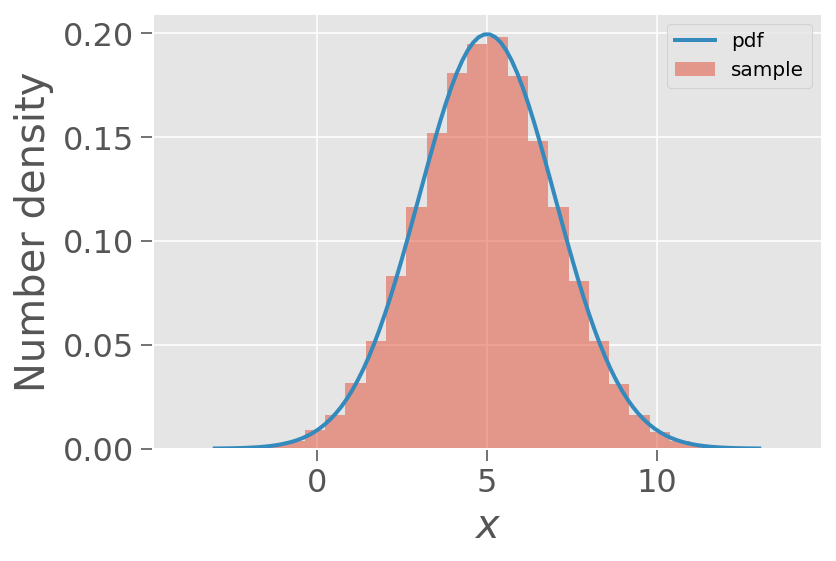

In [9]:
# The histogram of a sample drawn from a gaussian

N_sample = 100000
sample = gaussian_rv.rvs(size=N_sample)

plt.hist(sample, bins=30, density=True, alpha=0.5, label='sample')

x_to_plot = np.linspace(mu-4*sigma, mu+4*sigma, 100)
plt.plot(x_to_plot, gaussian_rv.pdf(x_to_plot), label='pdf')

plt.ylabel(r'Number density')
plt.legend()
_= plt.xlabel(r'$x$')

In [10]:
# Testing the 2 sigma interval

n_in_2_sigma = np.sum((sample>mu-2*sigma) * (sample<mu+2*sigma)) / N_sample
print('{:.1f}% of the sample is within 2 sigma'.format(n_in_2_sigma * 100))

95.4% of the sample is within 2 sigma


In the literature it is very common to see statements like:

> the flux is $5\pm 2$ [erg/s/Hz]

(or its equivalent based on graphs with *errorbars*) **this statement requires some clarification about what that $\pm2$ means**. In general, it is assumed that the $\pm2$ refers to the $1\sigma$ interval and *assuming a gaussian distribution*. But it is always better to be more specific about the numbers you're quoting, so whenever you provide confidence intervals like this, be explicit about what they mean.

## 3.1.2 Combining Gaussian Random Variables

If $X\sim \mathcal{N}(\mu_1, \sigma_1^2)$ and $Y\sim \mathcal{N}(\mu_2, \sigma_2^2)$, then $(X+Y) \sim \mathcal{N}(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2)$. And you can guess what happens when multiplying by a constant, taking averages, etc.

Let's do another MC.

In [11]:
N_sample = 100000

mu1, sigma1 = 5, 2
mu2, sigma2 = 3, 4

sample1 = norm.rvs(loc=mu1, scale=sigma1, size=N_sample)
sample2 = norm.rvs(loc=mu2, scale=sigma2, size=N_sample)

# What is the distribution of the difference X-Y?
combined_sample = sample1 - sample2

# For comparison, let's make the theoretical pdf of these two combined RVs.
combined_mu = mu1-mu2
combined_sigma = np.sqrt(sigma1**2 + sigma2**2)
gaussian_rv_combination = norm(loc=combined_mu, scale=combined_sigma)

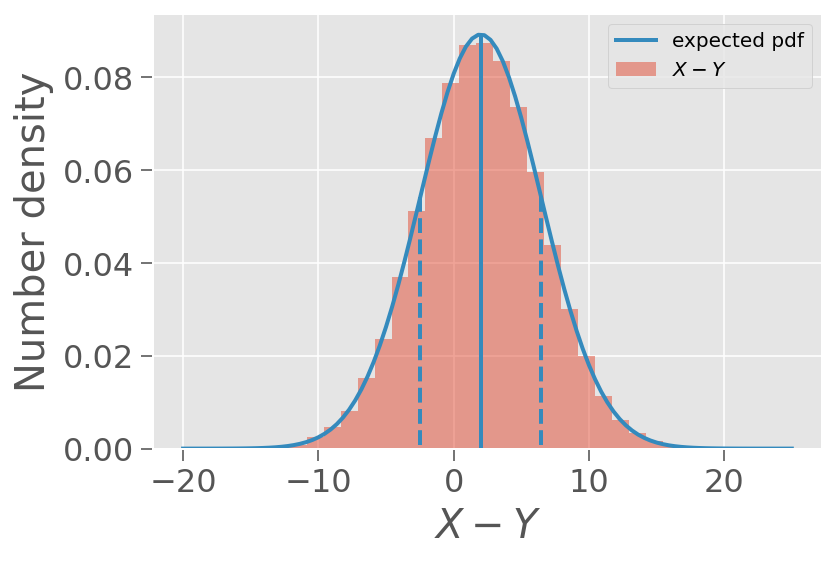

In [13]:
plt.hist(combined_sample, bins=30, density=True, alpha=0.5, label='$X-Y$')

x_to_plot = np.linspace(-20, 25, 100)
plt.plot(x_to_plot, gaussian_rv_combination.pdf(x_to_plot), label='expected pdf')

sigma_1lo, sigma_1up = combined_mu-combined_sigma, combined_mu+combined_sigma

plt.vlines(combined_mu, gaussian_rv_combination.pdf(combined_mu), 0, color=blue)
plt.vlines([sigma_1lo, sigma_1up], gaussian_rv_combination.pdf([sigma_1lo, sigma_1up]), 
           [0, 0], linestyle='--', color=blue)

plt.xlabel('$X-Y$')
plt.ylabel('Number density')
_= plt.legend()

## 3.1.3 Estimating the Parameters of a Gaussian Distribution from a Sample.

If we had some way of drawing values from a gaussian distribution, how do we go about estimating the original parameters ($\mu$ and $\sigma$) of that distribution?

$\bar{\mu}$ and $\bar{\sigma}$ are estimates of $\mu$ and $\sigma$ (which is the intrinsic parameter of the distribution), based on a given sample:

$$\bar{\mu} = \frac{1}{N}\sum_{i=1}^N x_i\\
\bar{\sigma}^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i-\bar{\mu})^2$$

For an intuitive explanation of that $(N-1)$ in $\bar{\sigma}^2$, see Ch.3.2 of "Practical Statistics for Astronomers". It makes the sample estimate of the population variance *unbiased*. For large $N$, it makes no difference.

### 3.1.3.1 Confidence Intervals for the Parameter Estimates.

Say we repeat an experiment $N$ times and we have reasons to think that the outcomes are drawn from a gaussian distribution. An average of the $N$ outcomes is an estimate of the (intrinsic) mean of the parent distribution (the value that we are ultimately interested in). In science that estimate is not enough. We need to provide a range within which we have a certain degree of confidence that the true value can be found. This is the idea of a confidence interval. For example, we would like to say something like:

> There is a 68% chance that the true value is within the range $[\bar{\mu}-\epsilon, \bar{\mu}+\epsilon]$.

The idea is that in each repetition of the experiment, $x_i$ is a sample drawn from the same parent gaussian distribution. If so, then the mean of $N$ $x_i$ values is **also a gaussian RV**. The (intrinsic) mean of this *combined* RV, is the mean of all the parent $\mu$s (which in this case are all identical), and the variance is $\sigma^2/N$s. So we can say that:

$$\bar{\mu} \sim \mathcal{N} \left( \mu, \frac{\sigma^2}{N} \right)$$

Time for a MC.

In [14]:
# Our intrinsic gaussian
mu = 10.
sigma = 2.

parent_rv = norm(loc=mu, scale=sigma)

If we take a sample, say of 10 values, from this distribution, we can use those values to estimate the parameters of the parent distribution:

In [15]:
# one sample
N_sample = 10
sample = parent_rv.rvs(size=N_sample)

print('Our estimate of the mean is: {:.2f}'.format(np.mean(sample)))
print('Our estimate of the variance is: {:.2f}'.format(np.var(sample)))

Our estimate of the mean is: 9.70
Our estimate of the variance is: 1.62


Previously, we concluded that this estimate of the mean, is also a RV. In this case $$\bar{\mu} \sim \mathcal{N} \left( 10, \frac{2^2}{10} \right)$$



What this means is that if we were to repeat our estimate of the mean many times, 68% of the times, the true value of the parent mean would be contained in the range $[10-2/\sqrt{10}: 10+2/\sqrt{10}]$.

Let's test this.

Shape of sample: (10, 100000)
Shape of mean_estiamtes: (100000,)


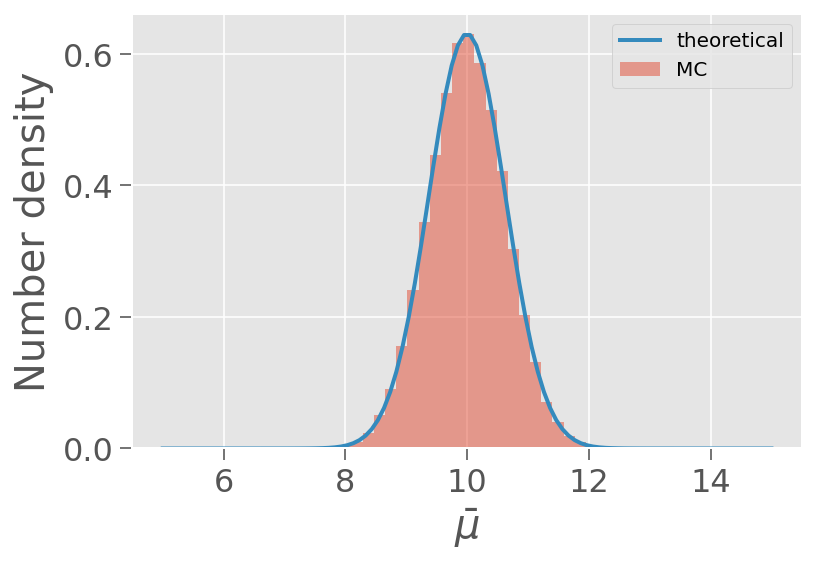

In [16]:
# First, let's build the RV for the estimate of the mean:
mean_rv = norm(loc=mu, scale=sigma/np.sqrt(N_sample))

# Now the MC experiment
N_repetitions = 100000
sample = parent_rv.rvs(size=(N_sample, N_repetitions))

print('Shape of sample: {}'.format(sample.shape))

mean_estimates = np.mean(sample, axis=0)
print('Shape of mean_estiamtes: {}'.format(mean_estimates.shape))

plt.hist(mean_estimates, bins=30, density=True, label='MC', alpha=0.5)

x_to_plot = np.linspace(5, 15, 100)
plt.plot(x_to_plot, mean_rv.pdf(x_to_plot), label='theoretical')

plt.xlabel(r'$\bar{\mu}$')
plt.ylabel('Number density')
_= plt.legend()

In [17]:
frac_within_1_sigma = (np.sum(  (mean_estimates >= 10-1*2/np.sqrt(10)) 
                              * (mean_estimates <= 10.+1*2/np.sqrt(10))) 
                       / N_repetitions)
frac_within_2_sigma = (np.sum(  (mean_estimates >= 10-2*2/np.sqrt(10)) 
                              * (mean_estimates <= 10.+2*2/np.sqrt(10))) 
                       / N_repetitions)

print("Fraction of repetitions within +/- 1 sigma: {:.1f}%".format(frac_within_1_sigma*100))
print("Fraction of repetitions within +/- 2 sigma: {:.1f}%".format(frac_within_2_sigma*100))

Fraction of repetitions within +/- 1 sigma: 68.1%
Fraction of repetitions within +/- 2 sigma: 95.5%


**The previous result importantly shows that the bigger the sample, the tighter the distribution from which $\bar{\mu}$ is drawn, i.e., the estimate has a better chance of being close to the intrinsic mean. This accuracy improves with $\sqrt{N}$.**

Let's make several estimates of the mean with varying sample sizes.

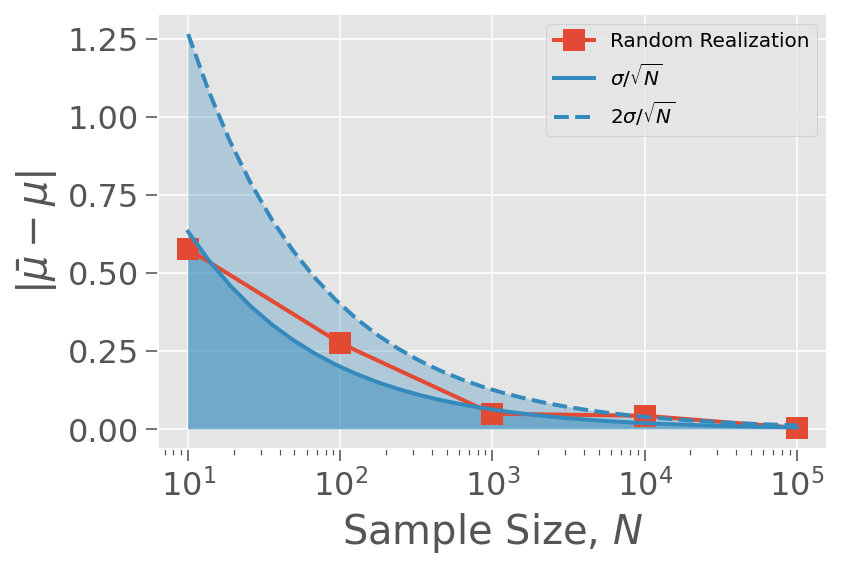

In [18]:
N_sample = 100000
sample = parent_rv.rvs(size=N_sample)

# In this case, the sample sizes will go from 10^1-10^5
n_range = np.logspace(1, 5, 5).astype('int')
mean_estimates = []
for i in n_range:
    mean_estimates.append(np.mean(sample[0:i]))

mean_estimates = np.array(mean_estimates)

plt.plot(n_range, np.fabs(mu-mean_estimates), marker='s', ls='-', 
         label='Random Realization')

x_to_plot = np.logspace(1, 5, 30)
plt.plot(x_to_plot, sigma/np.sqrt(x_to_plot), label='$\sigma/\sqrt{N}$')
plt.plot(x_to_plot, 2*sigma/np.sqrt(x_to_plot), color=blue, ls='--', 
         label='$2\sigma/\sqrt{N}$')

plt.fill_between(x_to_plot, 2*sigma/np.sqrt(x_to_plot), y2=0, facecolor=blue, 
                 alpha=0.3)
plt.fill_between(x_to_plot, 1*sigma/np.sqrt(x_to_plot), y2=0, facecolor=blue, 
                 alpha=0.5)

plt.xlabel('Sample Size, $N$')
plt.ylabel(r'$|\bar{\mu}-\mu|$')
plt.xscale('log')
_= plt.legend()

OK, fine, but how can I use this information to estimate confidence intervals. All I know now is that:

$$\bar{\mu} \sim \mathcal{N} \left( \mu, \frac{\sigma^2}{N} \right)$$

where $\bar{\mu}$ is a *good* estimator of $\mu$ but I don't know $\sigma$.

As it turns out, it can be proven that:

$$\frac{\bar{\mu} - \mu}{\bar{\sigma}/\sqrt{N}} \sim t_{N-1}$$

Where $t_{N-1}$ is the t-Student's distribution with $N-1$ degrees of freedom. The t-Student distrution with $\nu$ degrees of freedom has an analytic PDF:

$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}$$

Let's see what it looks like.

In [19]:
from scipy.stats import t # the t-student distributions

df = 10 # the degrees of freedom
student_rv = t(df)

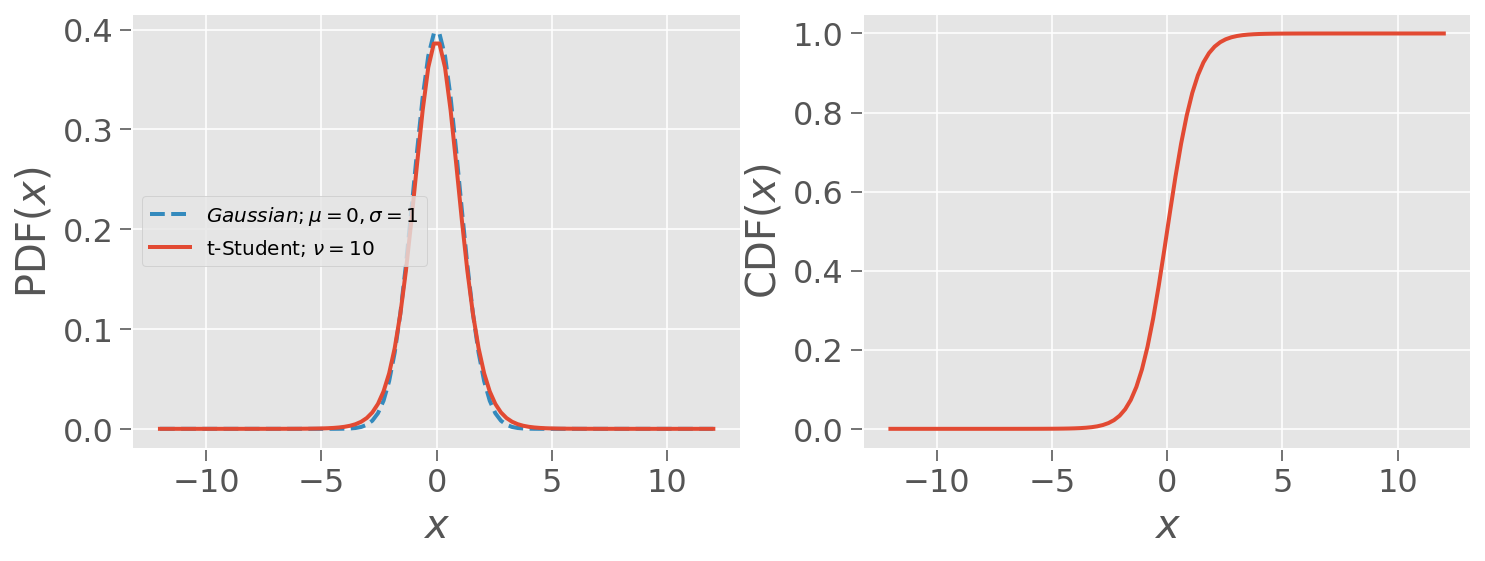

In [20]:
x_to_plot = np.linspace(-12, 12, 100)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(x_to_plot, norm.pdf(x_to_plot, loc=0, scale=1), 
         color=blue, ls='--', label='$Gaussian; \mu=0, \sigma=1$')
plt.plot(x_to_plot, student_rv.pdf(x_to_plot), 
         color=red, label=r't-Student; $\nu=10$')
plt.xlabel('$x$')
plt.ylabel('PDF($x$)')

plt.legend(loc='center left')

plt.subplot(122)
plt.plot(x_to_plot, student_rv.cdf(x_to_plot))
plt.xlabel('$x$')
_= plt.ylabel('CDF($x$)')

And we can take a look at its moments too:

In [21]:
E, V, S, K = student_rv.stats(moments='mvsk')
print('E(x)={}, Var(x)={}, Sigma(x)={}, K(x)={}'.format(E, V, S, K))

E(x)=0.0, Var(x)=1.25, Sigma(x)=0.0, K(x)=1.0


**What's the impact of the $\nu$ parameter?**

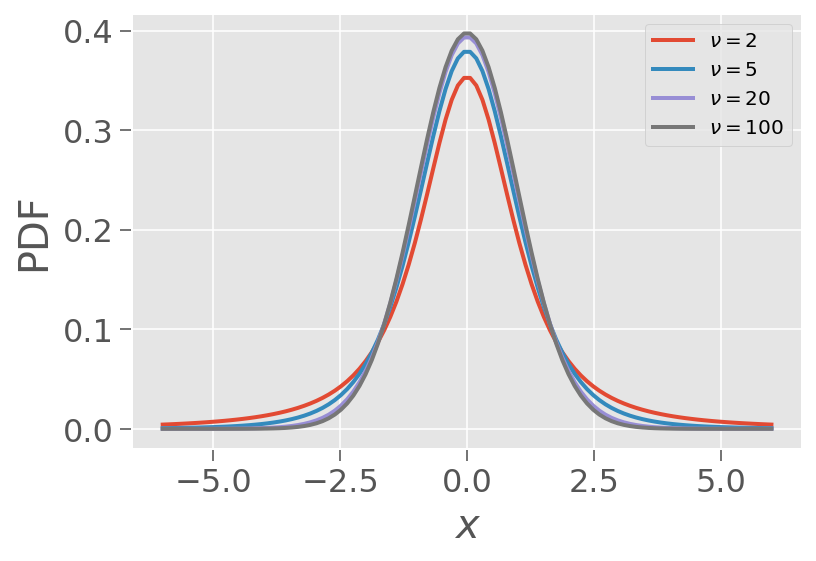

In [22]:
x_to_plot = np.linspace(-6, 6, 100)

nu_values = [2, 5, 20, 100]
for nu in nu_values:
    plt.plot(x_to_plot, t.pdf(x_to_plot, nu), 
             label=r"$\nu={:d}$".format(nu))

plt.xlabel('$x$')
plt.ylabel('PDF')

_= plt.legend()

Let't use a MC to visualize the origin of the t-Student distribution.

Again we will use a parent gaussian distribution with known $\mu$ and $\sigma$ and will draw a samples of size $N$. By repeating the experiment $N_{\rm repetitions}$ times we can see what the distribution of the RV: $t = \frac{\bar{\mu} - \mu}{\bar{\sigma}/\sqrt{N}}$ looks like.

In [23]:
mu = 10.
sigma = 2.
N_sample = 15
N_repetitions = 100000

parent_rv = norm(loc=mu, scale=sigma)
sample = parent_rv.rvs(size=(N_sample, N_repetitions))

mu_bar = np.mean(sample, axis=0)
sigma_bar = np.std(sample, ddof=1, axis=0)

# Now we construct the quantity whose distribution we think we know:
t_rv = (mu_bar - mu) / (sigma_bar/np.sqrt(N_sample))

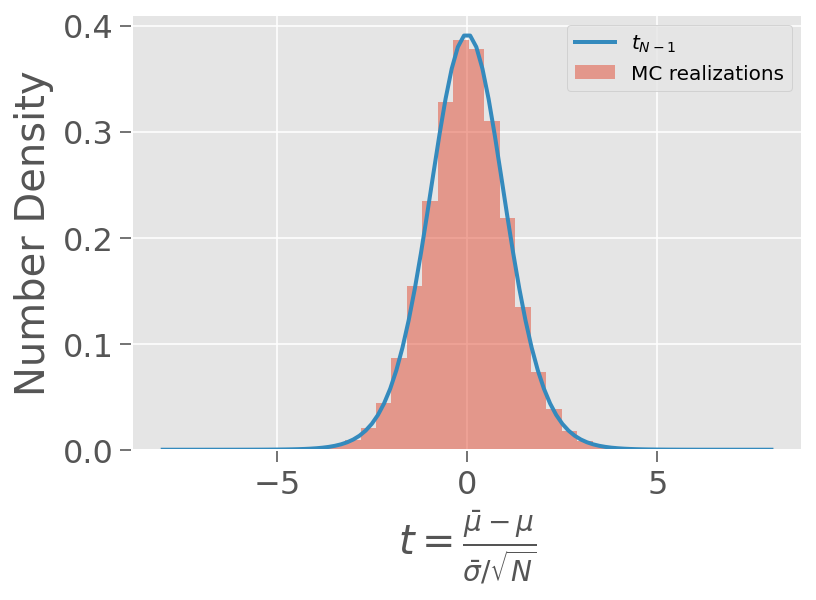

In [24]:
plt.hist(t_rv, bins=30, density=True, alpha=0.5, label='MC realizations')

# Let's build the corresponding t-Student distribution
x_to_plot = np.linspace(-8, 8, 100)
plt.plot(x_to_plot, t.pdf(x_to_plot, N_sample-1), label=r'$t_{N-1}$')

plt.xlabel(r'$t = \frac{\bar{\mu} - \mu}{\bar{\sigma}/\sqrt{N}}$')
plt.ylabel('Number Density')

_= plt.legend()

You may have realized by now that, given this amazing property, we can very easily estimate confidence intervals for our estimate of $\mu$.

The idea is to find the interval that contains $(1-\alpha)\%$ of the distribution for $\frac{\bar{\mu} - \mu}{\bar{\sigma}/\sqrt{N}}$. Once we have the interval, we can work out an interval for $\mu$ which will depend on one realization of $\bar{\mu}$ and $\bar{\sigma}$.

For example, let's pick $\alpha=5%$, that means, we will be looking for the $95\%$ confidence interval (a usual approximation for the $2\sigma$ interval).

In [25]:
student = t(N_sample-1)

alpha = 0.05

q = student.ppf([alpha/2, 1-alpha/2])
print("The {}% confidence interval on t is [{:.3f}: {:.3f}]"
      " (Notice that it is symmetric)".format(100 * alpha, *q))

# The first random realization that we did before is:
sample_1 = sample[:, 0]
mu_1 = sample_1.mean()
sigma_1 = sample_1.std(ddof=1)

# Now we change variable to mu
mu_ci = mu_1 - q * sigma_1 / np.sqrt(N_sample)

print("That translates into a confidence interval for mu: "
      "[{:.3f}: {:.3f}]".format(*mu_ci))
print("We can also say that mu = "
      "{:.3f} +/- {:.3f}".format(mu_1, np.fabs(q * sigma_1 / np.sqrt(N_sample))[0]))

The 5.0% confidence interval on t is [-2.145: 2.145] (Notice that it is symmetric)
That translates into a confidence interval for mu: [10.695: 8.990]
We can also say that mu = 9.843 +/- 0.853


These types of analytic results are very useful because with them we can make very quick estimates when the right conditions are met. In this case, what is required is gaussianity pretty much everywhere. There are a few more modern results that are slightly more general and that allow us to make estimates of confidence intervals at a higher computational cost.

One important characteristic of the t-Student, is that it approaches a $\mathcal{N}(0, 1)$ very quickly (for $\nu\gtrsim20$).

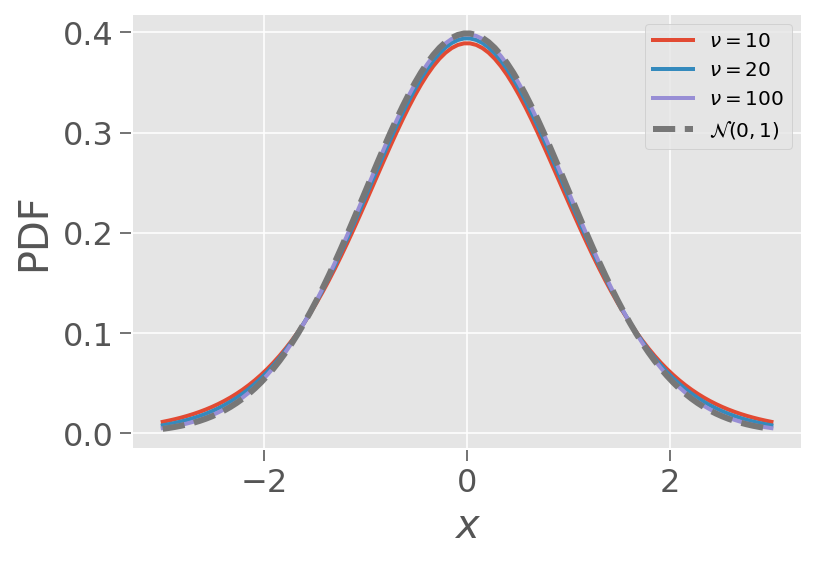

In [26]:
x_to_plot = np.linspace(-3, 3, 100)

nu_values = [10, 20, 100]
for nu in nu_values:
    plt.plot(x_to_plot, t.pdf(x_to_plot, nu), 
             label=r"$\nu={:d}$".format(nu))

plt.plot(x_to_plot, norm.pdf(x_to_plot, loc=0, scale=1), 
         label=r'$\mathcal{N}(0, 1)$', ls='--', lw=3.)

plt.xlabel('$x$')
plt.ylabel('PDF')

_= plt.legend()


That means that for big samples, one can just use the $\mathcal{N}(0, 1)$ to estimate confidence intervals. In particular, in the case of our estimate of the mean, $\bar{\mu}$, one can approximate:

$$\sigma_\bar{\mu} = \frac{\bar{\sigma}}{\sqrt{N}}$$

$$\mu \sim \mathcal{N}\left(\bar{\mu}, \frac{\bar{\sigma}}{\sqrt{N}}\right)$$

With similar arguments, it can be show that for large $N$:, the distribution for our estimate of the variance aproaches:

$$ \sigma \sim \mathcal{N}\left( \bar{\sigma}, \frac{\bar{\sigma}}{\sqrt{2 (N-1)}} \right) $$

---

### Example 1: Magnitude limit of an Image.

The `assets/noise.fits` file is a fake, background subtracted image of an empty patch of sky (it's actually just gaussian noise). The pixel have size $0.^"3$ on a side and its values are in units of $nJy$. What is the $1\sigma$ limiting magnitude on $2.^"5$-diameter apertures.

### Solution.

The following is general information about the structure of the file:

Filename: assets/01-noise.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (200, 200)   float64   
None


-----------------------------
Below is the header of the first HDU:

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  200                                                  
NAXIS2  =                  200                                                  
EXTEND  =                    T                                                  


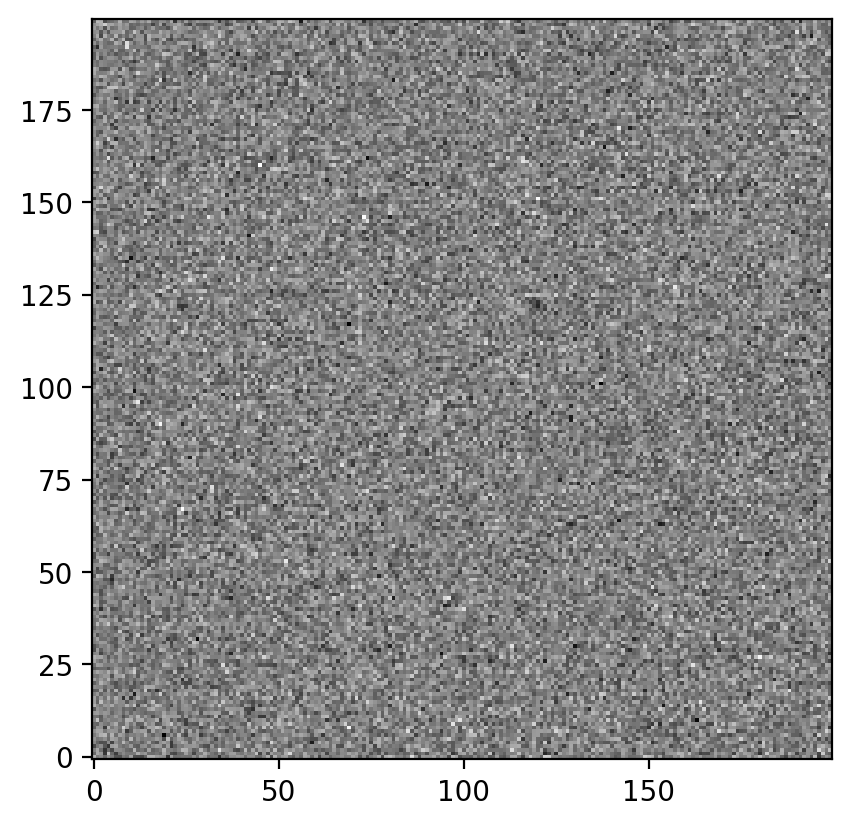

In [28]:
from astropy.io import fits

img = fits.open('assets/01-noise.fits')

print("The following is general information about the structure of the file:\n")
print(img.info())

print("\n\n-----------------------------")
print("Below is the header of the first HDU:\n")
print(repr(img[0].header))

data = img[0].data

with plt.style.context("default"):
    plt.imshow(data, cmap='gray', origin='lower')

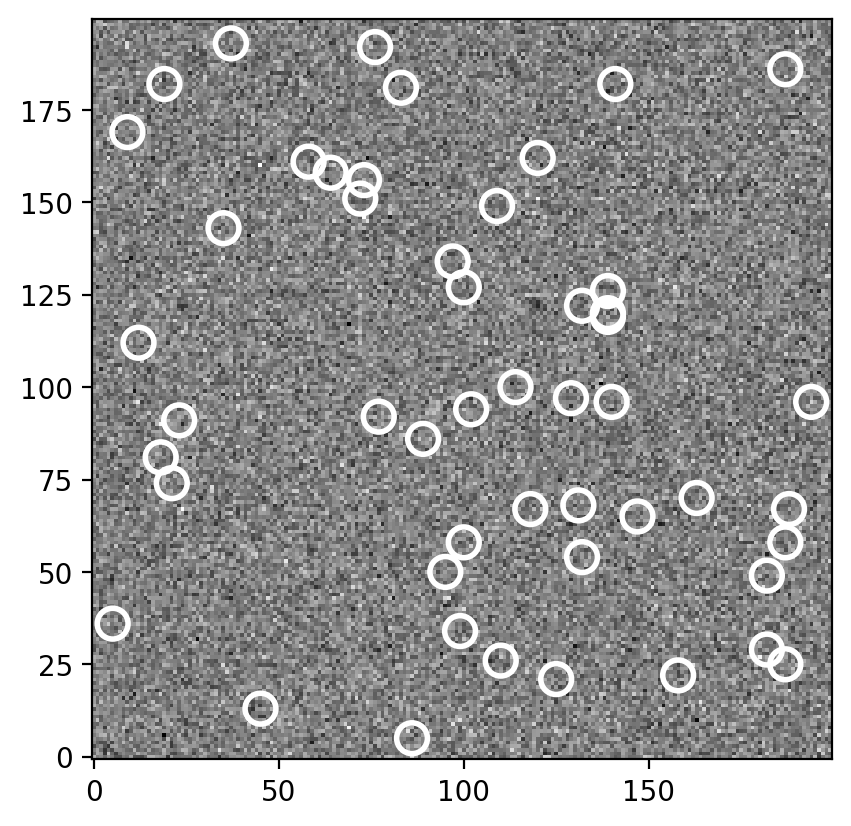

In [33]:
from photutils import CircularAperture

aperture_diameter_arcsecs = 2.5
pixel_scale = 0.3 # arcsecs/pixel
aperture_radius = 2.5 / pixel_scale / 2

min_center = int(np.ceil(aperture_radius))
max_center = int(np.floor(data.shape[0]-aperture_radius))

N_apertures = 50
x_centers = np.random.randint(min_center, max_center, size=N_apertures)
y_centers = np.random.randint(min_center, max_center, size=N_apertures)

random_apertures = CircularAperture(zip(x_centers, y_centers), r=aperture_radius)

with plt.style.context("default"):
    plt.imshow(data, cmap='gray', origin='lower')
    random_apertures.plot(color='w', lw=2)

In [34]:
from photutils import aperture_photometry

photometry = aperture_photometry(data, random_apertures)
print(photometry)

 id xcenter ycenter     aperture_sum   
      pix     pix                      
--- ------- ------- -------------------
  1   158.0    22.0 -134.68380069778354
  2   187.0    25.0  216.36500587836468
  3    18.0    81.0   62.76262431145661
  4    97.0   134.0  -80.32866980667754
  5    99.0    34.0 -341.93538846530925
  6    83.0   181.0  -61.60419379220299
  7   114.0   100.0  472.81993365512636
  8   132.0    54.0  -30.33607743064689
  9    21.0    74.0   352.5497893161763
 10   163.0    70.0  -439.4972088964663
...     ...     ...                 ...
 41    76.0   192.0  30.704105248931693
 42   120.0   162.0   70.75593399654636
 43   141.0   182.0   -636.331270523324
 44   194.0    96.0    154.561220494877
 45   187.0   186.0   79.44026190374203
 46    12.0   112.0  -93.60574098040746
 47   188.0    67.0 -128.38956441861302
 48    19.0   182.0 -380.75489176970143
 49   182.0    49.0  344.04187736355664
 50   131.0    68.0   159.2573237687921
Length = 50 rows


The std of the fluxes: 315.996


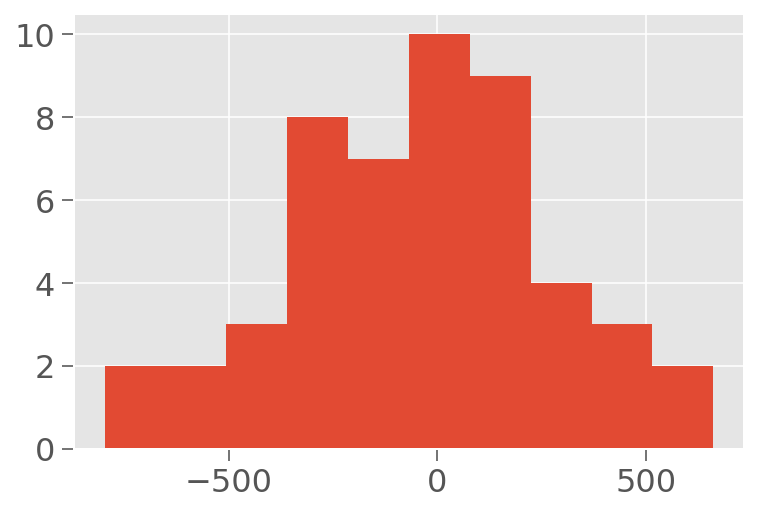

In [35]:
fluxes = photometry['aperture_sum'].data
plt.hist(fluxes)

fluxes_std = fluxes.std(ddof=1)
print('The std of the fluxes: {:.3f}'.format(fluxes_std))

In [36]:
mag_lim = 31.4 - 2.5 * np.log10(fluxes_std) # Here 31.4 is the AB zeropoint for nJy

print('The corresponding 1 sigma limiting magnitude is: {:.2f}'.format(mag_lim))

The corresponding 1 sigma limiting magnitude is: 25.15


Note that this number is a RV, so we can also estimate its uncertainty (you do it). Since you can choose `N_apertures`, you can make it as big as necessary to reach a certain accuracy.

What this means is that, just by random fluctuations, we can have objects as bright or brighter than the limiting magnitude with a frequency of 16%. Or in other words, if we were to randomly place apertures of size 2.^"5 in diameter, 16% of the time they would be brighter than the limiting magnitude even though there is no object there.

By picking a more stringent constrain, say 5$\sigma$, we limit this random occurrence to $\sim3\times10^{-5}\%$. Is this enough? Nowadays there are huge images in Astronomy. For example, DECam is an instrument that produces images with $5.2\times10^8$ pixels.

---

### 3.1.3.2 Bootstrap

As we saw in the analytic result, what we need to estimate confidence intervals, is to know what is the underlying distribution for the RV $(\bar{\mu}-\mu)$. If we know that distributions we can just ask for its quantiles to get confidence intervals. The Bootstrap studies show how to find a good approximation (based on a data sample) of that underlying distribution.

The way to obtain that bootstrap distribution is by making all the possible combinations of *sampling with replacement* from the orginal data sample. The number of possible combinations is huge, but a good approximation can be obtained by generating $N_{\rm bootstrap} = N (ln(N))^2$ samples with replacement. In each resampling, we can estimate the desired **statistic** (that is just a numeric function of a random variable), in this case the mean. The mean estimated in each resampling is a random variable, $\mu^*$. What the bootstrap studies show is that the intrinsic distribution of the composite RV $(\mu^*-\bar{\mu})$ very closely approximates (it converges for large samples) the distribution of the RV $(\bar{\mu} - \mu)$.

Let's MC.

In [37]:
mu, sigma = 10.,  2.

parent_rv = norm(loc=mu, scale=sigma)
N_sample = 35
base_sample = parent_rv.rvs(size=N_sample)
mu_bar = np.mean(base_sample)

print('Our estimate of mu is {:.3f}'.format(mu_bar))

Our estimate of mu is 10.392


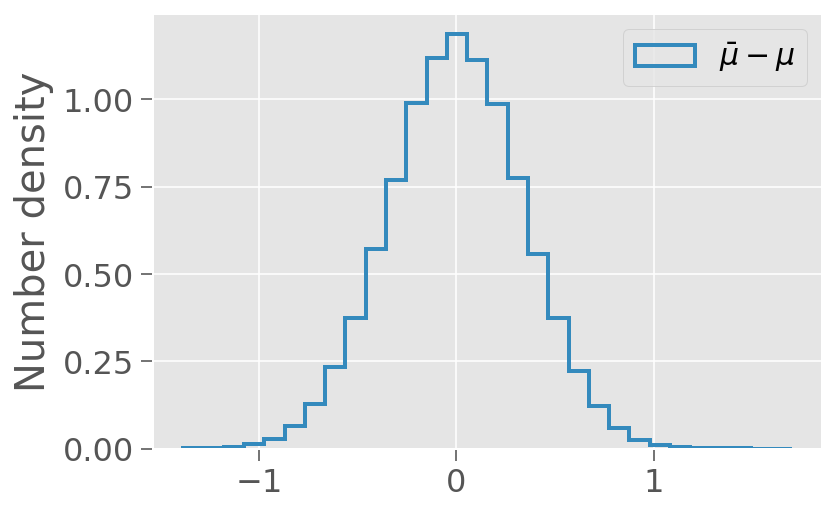

In [38]:
# Let's MC the distribution of mu_bar - mu

N_repetitions = 100000
sample = parent_rv.rvs(size=(N_sample, N_repetitions))

sample_means = np.mean(sample, axis=0)

plt.hist(sample_means-mu, bins=30, density=True, histtype='step', 
         color=blue, lw=2, label=r'$\bar{\mu}-\mu$')

plt.ylabel('Number density')
_= plt.legend(fontsize=15)

Now let's see how to do a Bootstrap resampling.

In [39]:
# here is how to do a single sampling with replacement in python

indices = np.random.randint(0, high=N_sample, size=N_sample)
realization = base_sample[indices]
print(realization)

[ 8.94885595 10.68786747 12.16549635 11.0216589  10.68786747 12.0714899
 10.26837229 11.19556614 10.53047975 10.70535745 10.08528144 15.02109878
  8.34666763 12.89172892  9.32245052 10.53047975  9.63699251  9.32245052
  6.46219616 10.20462926 12.69714829 10.70535745  9.53462652 11.19556614
 12.59823552  7.80556215 10.26837229  9.63699251 10.98629215  9.63699251
 13.02099593 13.02099593 15.02109878 10.70535745  9.53462652]


Now we have to do this $N_{\rm bootstrap}$ times and take the mean each time.

In [40]:
N_boot = int(np.round(N_sample * np.log(N_sample)**2))

print("The recomended sample size is {}".format(N_boot))

The recomended sample size is 442


In [41]:
bootstrap_means = []
N_boot = 100000 # Computers are fast, let's make more than the recommended

for i in range(N_boot):
    indices = np.random.randint(0, high=N_sample, size=N_sample)
    mean_of_sample = np.mean(base_sample[indices])
    bootstrap_means.append(mean_of_sample)
    
bootstrap_means = np.array(bootstrap_means)

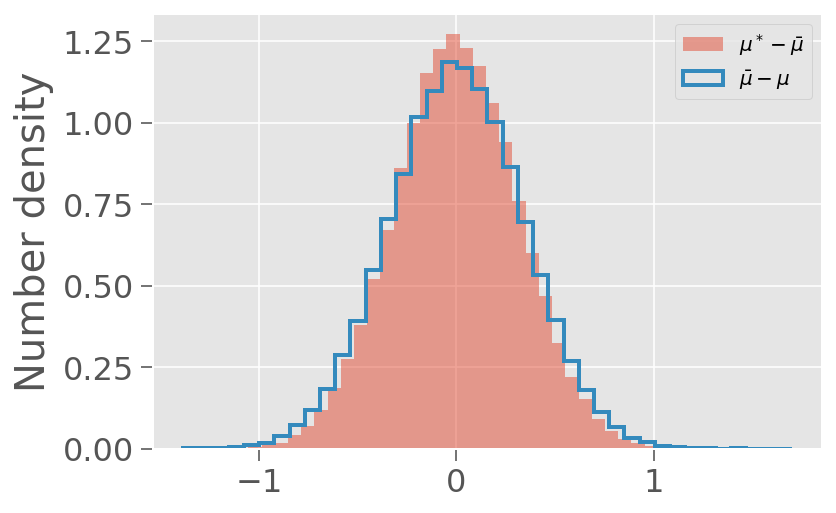

In [42]:
plt.hist(bootstrap_means - mu_bar, 
         bins=40, density=True, alpha=0.5, label=r'$\mu^*-\bar{\mu}$')

plt.hist(sample_means-mu, bins=40, density=True, histtype='step', 
         color=blue, lw=2, label=r'$\bar{\mu}-\mu$')

plt.ylabel('Number density')
_= plt.legend()

Here is a tip for a shorter `python` code that does the same and is faster.

In [43]:
indices = np.random.randint(0, high=N_sample, size=(N_sample, N_boot))

bootstrap_means = base_sample[indices].mean(axis=0)

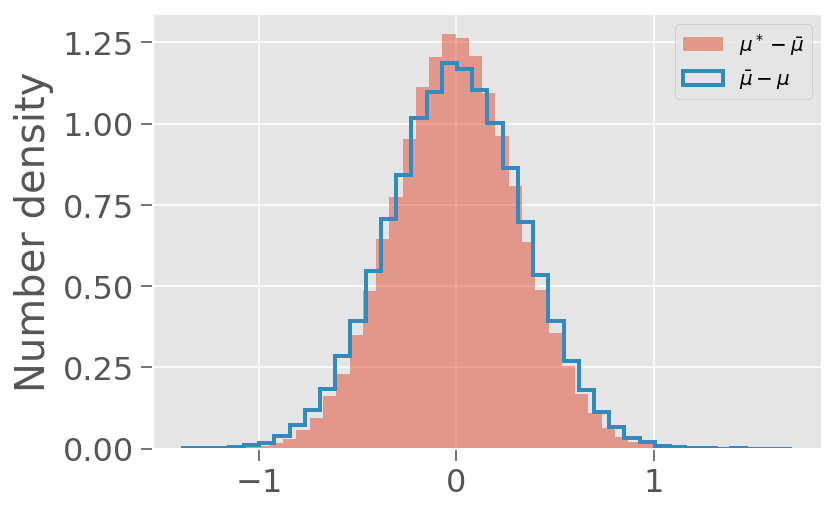

In [44]:
plt.hist(bootstrap_means - mu_bar, 
         bins=40, density=True, alpha=0.5, label=r'$\mu^*-\bar{\mu}$')

plt.hist(sample_means-mu, bins=40, density=True, histtype='step', 
         color=blue, lw=2, label=r'$\bar{\mu}-\mu$')

plt.ylabel('Number density')
_= plt.legend()

So now we can take the histogram we just built to be a good approximation of the distribution of $\bar{\mu}-\mu$. To estimate the confidence interval for a given $\alpha$, we need to find the quantiles of tha bootstrap distribution:

In [45]:
alpha = 0.05 # again, we are estimating the 2 sigma CI
q95 = np.percentile(bootstrap_means-mu_bar, [alpha/2*100, (1-alpha/2)*100])


print('The 95% CI for mu is [{:.2f}: {:.2f}]'.format(*(mu_bar+q95)))

The 95% CI for mu is [9.78: 11.01]


There is a related method called the **jacknife** that you can explore on your own. It is well described in all the texts in our bibliography.